# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv("data/WHR2018Chapter2OnlineData.csv")

### Rename Columns

In [4]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption',
                   'Confidence in national government', #
                   'Standard deviation of ladder by country-year',
                   'Standard deviation/Mean of ladder by country-year',
                   'GINI index (World Bank estimate)',
                   'GINI index (World Bank estimate), average 2000-15',
                   'gini of household income reported in Gallup, by wp5-year'
                  ]

renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Confidence in national government': 'Govt_Confidence', #
            'Standard deviation of ladder by country-year': 'Ladder_STD',
            'Standard deviation/Mean of ladder by country-year': 'Ladder_SD_Mean',
            'GINI index (World Bank estimate)': 'GINI_WB',
            'GINI index (World Bank estimate), average 2000-15': 'GINI_WB_Avg_00_15',
            'gini of household income reported in Gallup, by wp5-year': 'GINI_Gallup'
           }

df_renamed = df[cols_to_include].rename(renaming, axis=1)
df = df.drop(labels=cols_to_include, axis=1).join(df_renamed)

In [5]:
df.head(5)

,Democratic Quality,Delivery Quality,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,Govt_Confidence,Ladder_STD,Ladder_SD_Mean,GINI_WB,GINI_WB_Avg_00_15,GINI_Gallup
0,-1.929690,-1.655084,Afghanistan,2008,3.723590,0.517637,0.258195,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.612072,1.774662,0.476600,NaN,NaN,NaN
1,-2.044093,-1.635025,Afghanistan,2009,4.401778,0.583926,0.237092,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.611545,1.722688,0.391362,NaN,NaN,0.441906
2,-1.991810,-1.617176,Afghanistan,2010,4.758381,0.618265,0.275324,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.299357,1.878622,0.394803,NaN,NaN,0.327318
3,-1.919018,-1.616221,Afghanistan,2011,3.831719,0.611387,0.267175,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.307386,1.785360,0.465942,NaN,NaN,0.336764
4,-1.842996,-1.404078,Afghanistan,2012,3.782938,0.710385,0.267919,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.435440,1.798283,0.475367,NaN,NaN,0.344540


In [6]:
df.columns

Index(['Democratic Quality', 'Delivery Quality', 'country', 'year',
       'Happiness', 'Positive', 'Negative', 'LogGDP', 'Support', 'Life',
       'Freedom', 'Generosity', 'Corruption', 'Govt_Confidence', 'Ladder_STD',
       'Ladder_SD_Mean', 'GINI_WB', 'GINI_WB_Avg_00_15', 'GINI_Gallup'],
      dtype='object')

In [7]:
df.shape

(1562, 19)

In [8]:
df.dtypes

Democratic Quality    float64
Delivery Quality      float64
country                object
year                    int64
Happiness             float64
Positive              float64
Negative              float64
LogGDP                float64
Support               float64
Life                  float64
Freedom               float64
Generosity            float64
Corruption            float64
Govt_Confidence       float64
Ladder_STD            float64
Ladder_SD_Mean        float64
GINI_WB               float64
GINI_WB_Avg_00_15     float64
GINI_Gallup           float64
dtype: object

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<u><b>STUDENT ANSWER</b></u>

1. I chose the World Happiness Report (WHR) data set.
2. The label I will be predicting is the Happiness score.
3. This is a supervised learning problem because each entry has a label (Happiness score) to train with. Since the Happiness score is a continuous real-numbered value, this is a regression problem.
4. The most important features are still to be determined after further exploration of the data.
5. Understanding and predicting happiness levels across different regions can provide valuable insights for policymakers, businesses, and social organizations.
- For policymakers and social organizations, interventions can be designed to improve well-being by basing them on critical factors the model finds.
- For businesses, understanding the factors contributing to happiness can guide corporate social responsibility initiatives and provide insights into improving employee satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?  

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<u><b>STUDENT ANSWER:</b></u> Data exploration is done in Part 5.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

<u><b>STUDENT ANSWER: </b></u>
<ol>
    <li>Based on the analysis of the correlation matrix in Part 5, the best features were 'LogGDP', 'Standard deviation/Mean of ladder by country-year', 'Life', 'Support', 'Delivery Quality', 'Democratic Quality', 'Positive', and 'Freedom'</li>
    <li>
    I prepared my data by doing the following:
        <ul>
            <li>Limited outliers with winsorization</li>
            <li>Filled in missing values with the mean</li>
            <li>Normalized all values with StandardScaler</li>
            <li>Converted booleans into floats</li>
            <li>Removed non-predictive string columns</li>
        </ul>
    One-hot encoding couldn't be performed because the string columns had too many unique values. Converting them into binary columns would increase the dimensionality of our dataset and slow down computation.</li>
    </li>
    <li>I started w/ the linear regression model in scikit-learn due to the linearity in the data. Then, I trained other models like DTs and KNN to see which ones I could stack in an ensemble model to obtain a better accuracy.</li>
    <li>I found highly correlated features, as well as some slightly correlated ones, to build a modeling dataset with. Then, I performed feature selection to see which features I should keep to improve accuracy. Using these features, I performed cross-validation (k-fold, grid search) and ensemble modeling (stacking, random forest, gradient boosting) to select multiple models for one stacked model that generalizes against new data well.
</ol>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# training time evaluation
import time

# winsorization
import scipy.stats as stats

# normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model choices
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# ensemble modeling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# data partitioning
from sklearn.model_selection import train_test_split

# model selection and evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# model deployment
import pickle

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Data Preparation

### Handling String Values

Let's identify all columns with string values, as well as their unique values:

In [10]:
str_cols = df.select_dtypes(include=["object"]).columns

In [11]:
df[str_cols].head(1)

,country
0,Afghanistan


In [12]:
# print unique values of string columns
for i in str_cols:
    if df[i].nunique() < 100:
        print(i, df[i].nunique(), df[i].unique())
    else:
        print(i, df[i].nunique())

country 164


The country's name is neither predictive of its happiness nor sparse enough to one-hot encode (w/ `pd.get_dummies()`) into bianry columns so we will drop it.

<b>NOTE: </b> It is possible to group multiple rows with the same country into one row, but doing so will reduce the size of our data set significantly, affecting the model's ability to capture nuance in the data.

In [13]:
# drop inherently non-predictive columns
df.drop(labels='country', axis=1, inplace=True)

In [14]:
# check if string columns have changed
df.select_dtypes(include=["object"]).columns

Index([], dtype='object')

### Handling Outlier Numerical Values w/ Winsorization

The following code cell saves the names of feature columns with numerical values, which makes working with them easier down the line:

In [15]:
num_feat_cols = df.drop(labels='Happiness', axis=1).select_dtypes(include=['int64','float64']).columns
num_feat_cols

Index(['Democratic Quality', 'Delivery Quality', 'year', 'Positive',
       'Negative', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity',
       'Corruption', 'Govt_Confidence', 'Ladder_STD', 'Ladder_SD_Mean',
       'GINI_WB', 'GINI_WB_Avg_00_15', 'GINI_Gallup'],
      dtype='object')

Let's apply winsorization to limit the influence of extreme values and mitigate potential issues:
<ul>
    <li>Extreme minimums and maximums can skew the mean and standard deviation, distorting statistical analysis.</li>
    <li>These extreme values can also lead to a model that does not generalize well to unseen data.</li>
</ul>

The `pd.DataFrame.describe()` method summarizes our data set. The measures of interest are the `mean`, standard deviation (`std`), `min`, and `max`.

Here are the aforementioned statistics before the operation:

In [16]:
# examine stats BEFORE winsorization
df[list(num_feat_cols) + ['Happiness']].describe().loc[['std','mean','min','max']]

,Democratic Quality,Delivery Quality,year,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,Govt_Confidence,Ladder_STD,Ladder_SD_Mean,GINI_WB,GINI_WB_Avg_00_15,GINI_Gallup,Happiness
std,0.873259,0.981052,3.419787,0.107644,0.084006,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.190724,0.379684,0.119007,0.086609,0.083694,0.105410,1.121017
mean,-0.126617,0.004947,2011.820743,0.708969,0.263171,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.480207,2.003501,0.387271,0.372846,0.386948,0.445204,5.433676
min,-2.448228,-2.144974,2005.000000,0.362498,0.083426,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.068769,0.863034,0.133908,0.241000,0.228833,0.223470,2.661718
max,1.540097,2.184725,2017.000000,0.943621,0.704590,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.993604,3.527820,1.022769,0.648000,0.626000,0.961435,8.018934


The following two code cells performs winsorization on all columns:

In [17]:
# winsorize label column
df['label_Happiness'] = stats.mstats.winsorize(df['Happiness'], limits=[0.01, 0.01])

In [18]:
# winsorize numberical feature columns
for i in num_feat_cols:
    temp = df[i]
    df[i] = stats.mstats.winsorize(df[i], limits=[0.01, 0.01])
    # if no changes occurred, then temp - df[i] == 0
    print(i, (temp - df[i]).fillna(0).unique().any())

Democratic Quality True
Delivery Quality True
year False
Positive True
Negative True
LogGDP True
Support True
Life True
Freedom True
Generosity True
Corruption True
Govt_Confidence True
Ladder_STD True
Ladder_SD_Mean True
GINI_WB True
GINI_WB_Avg_00_15 True
GINI_Gallup True


Examine the statistics. The `std`, `mean`, `min`, and `max` should have changed.

In [19]:
# examine stats AFTER winsorization
df[list(num_feat_cols) + ['Happiness','label_Happiness']].describe().loc[['std','mean','min','max']]

,Democratic Quality,Delivery Quality,year,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,Govt_Confidence,Ladder_STD,Ladder_SD_Mean,GINI_WB,GINI_WB_Avg_00_15,GINI_Gallup,Happiness,label_Happiness
std,0.869275,0.977508,3.419787,0.106749,0.088067,1.182112,0.117182,7.945855,0.144024,0.163952,0.183191,0.190178,0.371878,0.115949,0.086330,0.083383,0.105105,1.121017,1.112060
mean,-0.124891,0.006860,2011.820743,0.709317,0.265728,9.221675,0.812850,62.344454,0.729475,0.000214,0.754302,0.480486,2.003268,0.386755,0.373045,0.387124,0.445374,5.433676,5.435275
min,-2.017452,-1.642179,2005.000000,0.465151,0.114123,6.633399,0.450662,42.407101,0.364206,-0.293943,0.161791,0.126142,1.283989,0.191132,0.257000,0.249091,0.269167,2.661718,3.174264
max,1.540097,2.184725,2017.000000,0.943621,0.599335,11.770276,0.982522,75.537704,0.985178,0.677773,0.983276,0.993604,3.043643,0.782641,0.648000,0.626000,0.961435,8.018934,7.614929


### Handling Missing (NaN) Numerical Values

By handling outliers first, we now have a non-skewed mean that we can safely impute into missing values.

Let's identify all columns with at least one row with a NaN value:

In [20]:
nan_count = np.sum(df.isnull())

nan_count

Democratic Quality    171
Delivery Quality      171
year                    0
Happiness               0
Positive               18
Negative                0
LogGDP                 27
Support                 0
Life                    0
Freedom                29
Generosity             80
Corruption             90
Govt_Confidence       161
Ladder_STD              0
Ladder_SD_Mean          0
GINI_WB               979
GINI_WB_Avg_00_15     176
GINI_Gallup           357
label_Happiness         0
dtype: int64

In [21]:
nan_detected = nan_count > 0

nan_cols = nan_detected[nan_detected == True].index

print(nan_cols)

Index(['Democratic Quality', 'Delivery Quality', 'Positive', 'LogGDP',
       'Freedom', 'Generosity', 'Corruption', 'Govt_Confidence', 'GINI_WB',
       'GINI_WB_Avg_00_15', 'GINI_Gallup'],
      dtype='object')


In [22]:
df[nan_cols].head()

,Democratic Quality,Delivery Quality,Positive,LogGDP,Freedom,Generosity,Corruption,Govt_Confidence,GINI_WB,GINI_WB_Avg_00_15,GINI_Gallup
0,-1.929690,-1.642179,0.517637,7.168690,0.718114,0.181819,0.881686,0.612072,NaN,NaN,NaN
1,-2.017452,-1.635025,0.583926,7.333790,0.678896,0.203614,0.850035,0.611545,NaN,NaN,0.441906
2,-1.991810,-1.617176,0.618265,7.386629,0.600127,0.137630,0.706766,0.299357,NaN,NaN,0.327318
3,-1.919018,-1.616221,0.611387,7.415019,0.495901,0.175329,0.731109,0.307386,NaN,NaN,0.336764
4,-1.842996,-1.404078,0.710385,7.517126,0.530935,0.247159,0.775620,0.435440,NaN,NaN,0.344540


Since only numerical columns have NaN values, we will replace each of them with the mean:

In [23]:
for i in nan_cols:
    
    if df[i].dtype == 'object': 
        continue
        
    # create dummy variables to indicate missingness
    df[f"{i}_na"] = df[i].isnull() 

    # replace NaN with mean
    df[i].fillna(value=df[i].mean(), inplace=True)

In [24]:
np.sum(np.sum(df.isnull())) # check for nulls again

0

<h3>Handling Non-Normalized Numerical Values w/ Rescaling</h3>

We will use scikit-learn's `StandardScaler()` to rescale our numeric columns:

In [25]:
scaler = StandardScaler()

# rescale features
df_num_feat_scaled = pd.DataFrame(scaler.fit_transform(df[num_feat_cols]), columns=num_feat_cols)
df = df.drop(columns=num_feat_cols)
df = df.join(df_num_feat_scaled)

# rescale label
df_label_scaled = pd.DataFrame(scaler.fit_transform(df[['Happiness', 'label_Happiness']]), columns=['Happiness', 'label_Happiness'])
df = df.drop(columns=['Happiness', 'label_Happiness'])
df = df.join(df_label_scaled)

In [26]:
df[list(num_feat_cols) + ['Happiness', 'label_Happiness']].head()

,Democratic Quality,Delivery Quality,year,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,Govt_Confidence,Ladder_STD,Ladder_SD_Mean,GINI_WB,GINI_WB_Avg_00_15,GINI_Gallup,Happiness,label_Happiness
0,-2.200922,-1.788314,-1.117604,-1.806633,-0.085560,-1.752488,-3.091806,-1.653566,-0.079649,1.137561,0.716547,0.730844,-0.614930,0.775111,1.053409e-15,7.070019e-16,-6.015655e-16,-1.525966,-1.539695
1,-2.307947,-1.780556,-0.825094,-1.181846,-0.325261,-1.611554,-2.224106,-1.601350,-0.354603,1.274083,0.538508,0.727918,-0.754737,0.039743,1.053409e-15,7.070019e-16,-3.758744e-02,-0.920796,-0.929651
2,-2.276677,-1.761200,-0.532585,-0.858183,0.108993,-1.566450,-2.337072,-1.552941,-0.906848,0.860763,-0.267394,-1.006013,-0.335287,0.069429,1.053409e-15,7.070019e-16,-1.279355e+00,-0.602588,-0.608880
3,-2.187909,-1.760164,-0.240075,-0.923011,0.016431,-1.542215,-2.490486,-1.507829,-1.637568,1.096907,-0.130465,-0.961423,-0.586154,0.683167,1.053409e-15,7.070019e-16,-1.176989e+00,-1.429479,-1.442430
4,-2.095200,-1.530103,0.052434,0.010068,0.024886,-1.455053,-2.494471,-1.464778,-1.391949,1.546844,0.119914,-0.250192,-0.551391,0.764476,1.053409e-15,7.070019e-16,-1.092729e+00,-1.473008,-1.486310


### Handling Boolean Values

Converting booleans into floats will make them suitable for modeling:

In [27]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(float)
df[bool_cols].head()

,Democratic Quality_na,Delivery Quality_na,Positive_na,LogGDP_na,Freedom_na,Generosity_na,Corruption_na,Govt_Confidence_na,GINI_WB_na,GINI_WB_Avg_00_15_na,GINI_Gallup_na
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Promoting Fair AI

To promote fair AI, our data must have an even distribution of labels. 
- For classification tasks, this means obtaining a balanced number of labels and/or a balanced number of features with respect to the label.
- For regression tasks, this means obtaining an even distribution across the range of the label, avoiding clusters or gaps that could bias the model's predictions.

The standard deviation of happiness is close to 1, meaning we are close to a normal distribution, as shown in the graph below.

However, if we wanted to flatten this graph (in other words, ensure the frequency of each value is the same), we could use some transformation function. Unfortunately, there aren't any functions to transform this distribution, as far as I know.

Standard deviation for Happiness: 1.0003202562131746


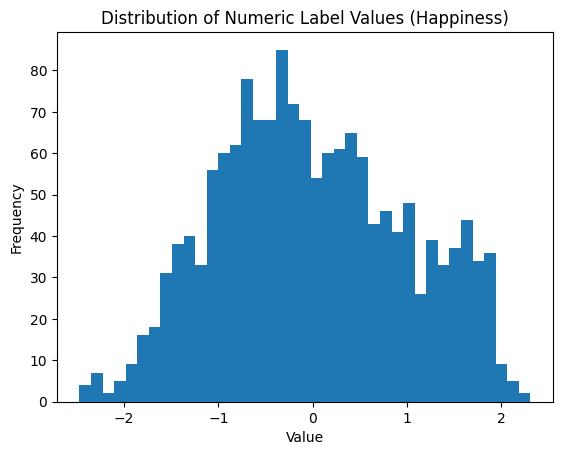

In [28]:
print("Standard deviation for Happiness:", df.describe()['Happiness']['std'])
plt.hist(df['Happiness'], bins=int(df['Happiness'].nunique()**0.5))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numeric Label Values (Happiness)')
plt.show()

## Data Exploration

### Finding High Correlations w/ Our Label

The `pd.DataFrame.corr()` method finds a column's correlation with other columns. Let's find all correlations with our Happiness label (after winsorization) and see which features have the strongest relationship:

Top Correlated Columns:
Index(['LogGDP', 'Ladder_SD_Mean', 'Life', 'Support', 'Delivery Quality',
       'Democratic Quality', 'Positive', 'Freedom'],
      dtype='object')


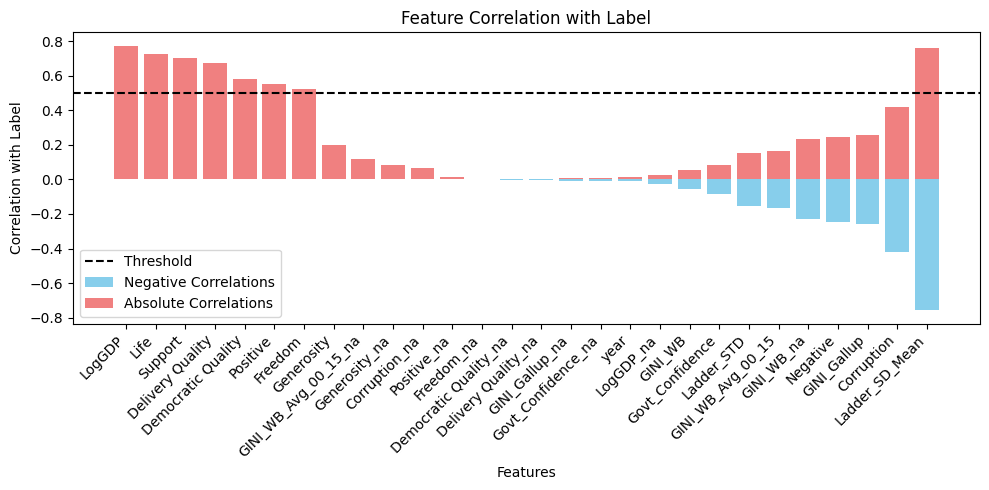

In [29]:
# find feature correlations with label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['label_Happiness']

# sort by highest correlation (excluding labels)
corrs_sorted = corrs.sort_values(ascending=False).drop(['Happiness','label_Happiness'])

# absolute value considers inversely proportional relationships
corrs_sorted_abs = np.absolute(corrs_sorted).sort_values(ascending=False)

# save the columns for feature selection
corrs_sorted_abs_cols = corrs_sorted_abs.index

# obtain top correlated columns
corr_threshold = 0.5
top_corr = corrs_sorted_abs[corrs_sorted_abs > corr_threshold].index

# print (optional)
print("Top Correlated Columns:")
print(top_corr)

# plot correlations 
plt.figure(figsize=(10, 5))
plt.bar(corrs_sorted.index, corrs_sorted.values, color='skyblue', label='Negative Correlations') # negatives
plt.bar(corrs_sorted_abs.index, corrs_sorted_abs.values, color='lightcoral', label='Absolute Correlations') # absolute values
plt.axhline(y=corr_threshold, color='black', linestyle='--', label='Threshold') # threshold
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.title('Feature Correlation with Label')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

We will create a dataframe with just the columns in `top_corr`. Later, we will evaluate it's performance.

In [30]:
# build a df w/ the high correlated features columns
df_corrs = pd.DataFrame({})
for i in top_corr:
    df_corrs[i] = df[i]

df_corrs['label_Happiness'] = df['label_Happiness']

In [31]:
df_corrs.head()

,LogGDP,Ladder_SD_Mean,Life,Support,Delivery Quality,Democratic Quality,Positive,Freedom,label_Happiness
0,-1.752488,0.775111,-1.653566,-3.091806,-1.788314,-2.200922,-1.806633,-0.079649,-1.539695
1,-1.611554,0.039743,-1.601350,-2.224106,-1.780556,-2.307947,-1.181846,-0.354603,-0.929651
2,-1.566450,0.069429,-1.552941,-2.337072,-1.761200,-2.276677,-0.858183,-0.906848,-0.608880
3,-1.542215,0.683167,-1.507829,-2.490486,-1.760164,-2.187909,-0.923011,-1.637568,-1.442430
4,-1.455053,0.764476,-1.464778,-2.494471,-1.530103,-2.095200,0.010068,-1.391949,-1.486310


In [32]:
df_corrs.columns

Index(['LogGDP', 'Ladder_SD_Mean', 'Life', 'Support', 'Delivery Quality',
       'Democratic Quality', 'Positive', 'Freedom', 'label_Happiness'],
      dtype='object')

### Visualizing Correlations of Best Features

According to the plots below, each feature has a linear relationship with our label.

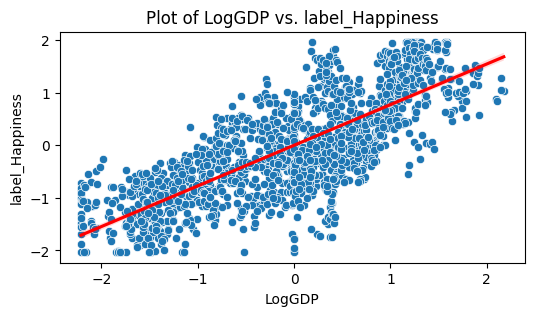

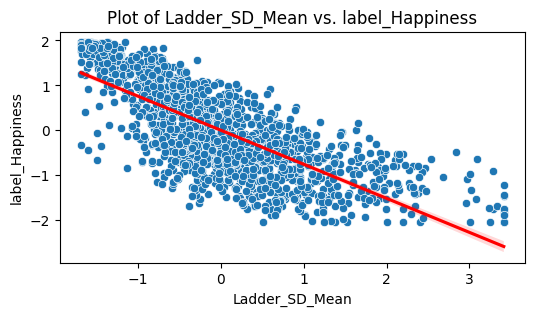

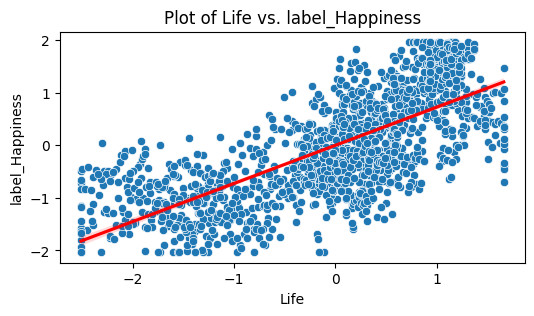

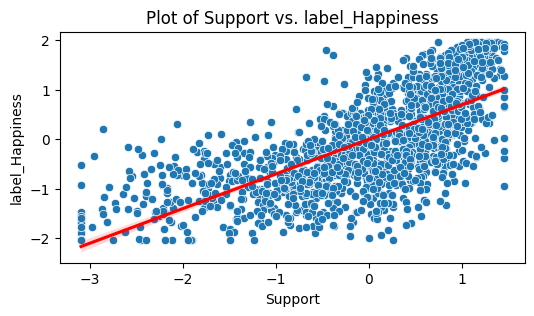

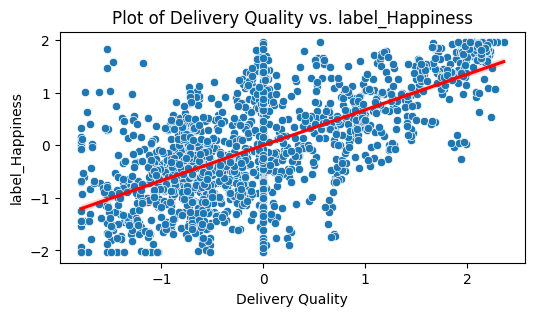

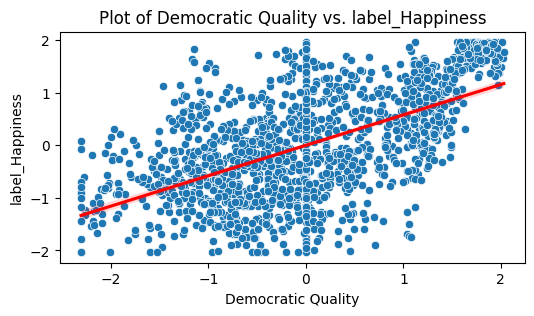

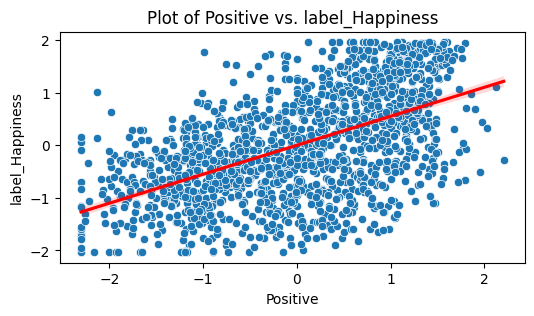

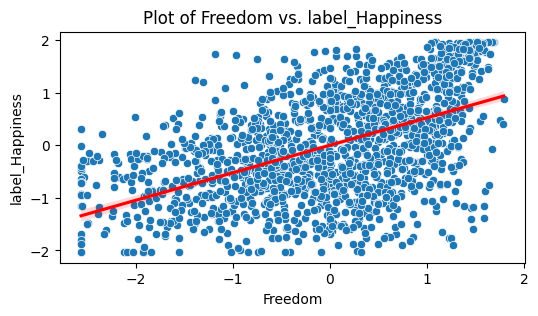

In [33]:
for i in df_corrs.columns:
    if i == 'label_Happiness':
        continue
    plt.figure(figsize=(6, 3)) 
    sns.scatterplot(x=i, y='label_Happiness', data=df_corrs)
    sns.regplot(x=i, y='label_Happiness', scatter=False, color='red', data=df_corrs)
    plt.title(f'Plot of {i} vs. label_Happiness')
    plt.xlabel(i)
    plt.ylabel('label_Happiness')
    plt.show() 

### Pairplot

Another way to view these relationships is to create a pair plot, which shows that plotting our features against a label creates a 'tilt', or linearity with our label.

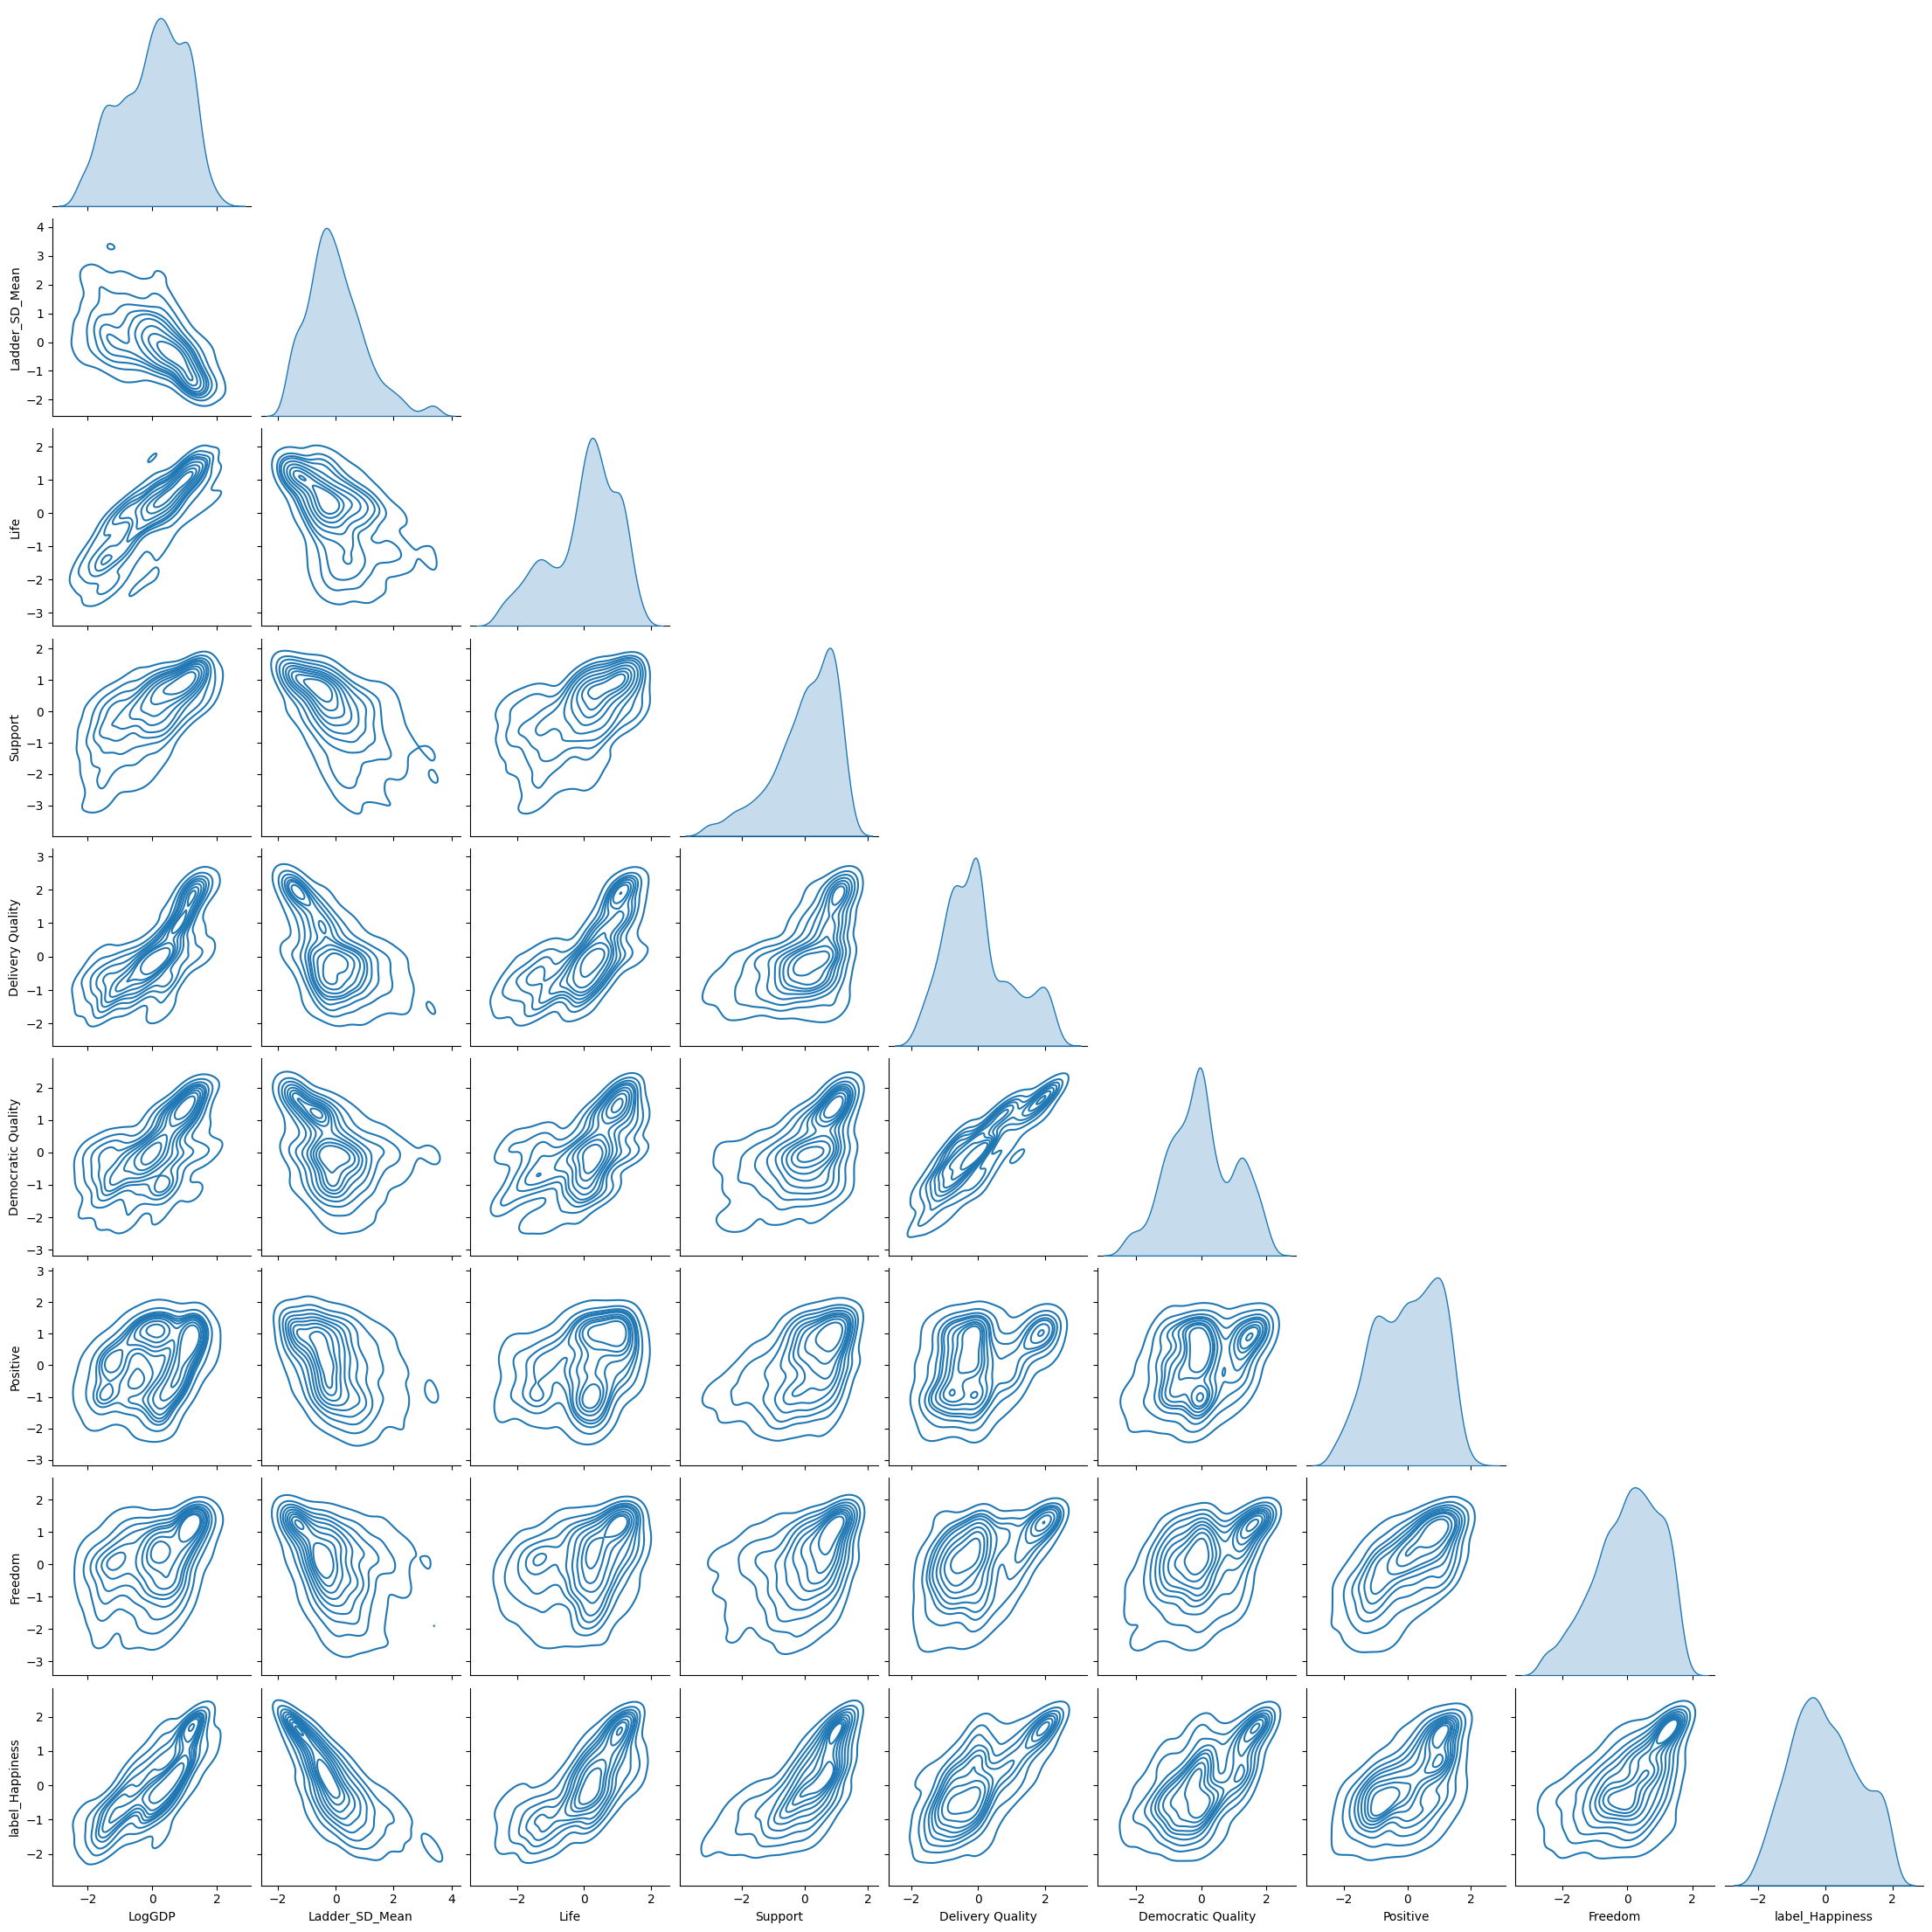

In [34]:
pairplot = sns.pairplot(df_corrs, kind='kde', corner=True)

In [35]:
pairplot.savefig("pairplot_output.png") # save pairplot

## Model Training

Our ML problem predicts a continuous real-numbered value. Earlier data analysis shows that there is linearity in our dataset. Therefore, scikit-learn's `LinearRegression` model will be appropriate to use. 

I created my own functions for printing a linear regression's summary and performance:

In [36]:
def lr_summary(model, rounding=3, verbose=0):
    if verbose:
        print(f'Model Summary')
        for i in range(len(model.coef_)):
            print(f'w{i + 1} = {round(model.coef_[i], rounding)}')
        print(f'a = {round(model.intercept_, rounding)}')
        print()
    result = list(model.coef_)
    result.append(model.intercept_)
    return result
    
def lr_performance(y_test, prediction, t0, t1, verbose=0):
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    r2 = r2_score(y_test, prediction)
    t = t1 - t0
    if verbose:
        print('Model Performance')
        print('RMSE =   %.2f' % rmse)
        print(' R^2 =   %.2f' % r2)
        print('Time =   %.5f' % t)
        print()
    return (rmse, r2, t)

### Define Features and Label

In [37]:
y = df['label_Happiness']

In [38]:
X = df.drop(labels=['label_Happiness', 'Happiness'], axis=1)

### Split Data Into Training And Testing Sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train.shape

(1249, 28)

### Train and Test Default Model (w/ ALL Features)

In [41]:
model_def = LinearRegression()

t0 = time.time()

model_def.fit(X_train, y_train)

t1 = time.time()

prediction_def = model_def.predict(X_test)

lr_performance(y_test, prediction_def, t0, t1, verbose=1)
lr_summary(model_def, rounding=4, verbose=1)
print("Default model done")

Model Performance
RMSE =   0.26
 R^2 =   0.93
Time =   0.01372

Model Summary
w1 = 6600179762173.828
w2 = -6600179762173.777
w3 = -0.1004
w4 = -0.0077
w5 = -0.1373
w6 = 0.0954
w7 = 0.0204
w8 = -0.0155
w9 = -0.0176
w10 = -0.1267
w11 = 0.0231
w12 = 0.0331
w13 = 0.0257
w14 = 0.0174
w15 = 0.046
w16 = 0.021
w17 = 0.1611
w18 = 0.0088
w19 = -0.0269
w20 = 0.0172
w21 = 0.0678
w22 = -0.1291
w23 = -0.0321
w24 = 0.6399
w25 = -1.0391
w26 = -0.0045
w27 = -0.0178
w28 = 0.0211
a = 0.0167

Default model done


### Train and Test w/ Top Correlated Features

In [42]:
X_top = df_corrs.drop(labels=['label_Happiness'], axis=1)

In [43]:
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2)

In [44]:
X_train_top.columns

Index(['LogGDP', 'Ladder_SD_Mean', 'Life', 'Support', 'Delivery Quality',
       'Democratic Quality', 'Positive', 'Freedom'],
      dtype='object')

In [45]:
X_train_top.shape

(1249, 8)

In [46]:
model_top = LinearRegression()

t0 = time.time()

model_top.fit(X_train_top, y_train)

t1 = time.time()

prediction_top = model_top.predict(X_test_top)

lr_performance(y_test, prediction_top, t0, t1, verbose=1)
lr_summary(model_top, rounding=4, verbose=1)
print("Top model done")

Model Performance
RMSE =   0.46
 R^2 =   0.79
Time =   0.00317

Model Summary
w1 = 0.2981
w2 = -0.3584
w3 = 0.1442
w4 = 0.0722
w5 = 0.022
w6 = 0.0097
w7 = 0.1705
w8 = 0.0866
a = -0.0028

Top model done


Some things to note:
<li>The default model contains extreme weight magnitudes.</li>
<li><b>The feature dataset with the top correlated features isn't capturing patterns that the regular dataset can.</b></li>

## Model Selection 

Let's improve our model's accuracy by implementing more rigorous evaluation techniques.

### Grid Search?

Unlike other training algorithms, like logistic regression (`C`) or kNN (`k`), linear regression doesn't have any hyperparameters. Therefore, it is not possible to create a hyperparameter grid and use scikit-learn's `GridSearchCV()` method to find the best model.

###  K-Fold Cross-Validation

Let's perform k-fold cross-validation to ensure our model isn't biased by a specific training set, which helps in reducing the model's variance (sensitivity to noisy data) and mitigating overfitting.

### Feature Selection

Let's perform feature selection to find the right balance between RMSE, R^2, and training time.

According to the scikit-learn documentation, `LinearRegression` does not have a `feature_importances_` attribute like other models such as `DecisionTreeClassifier`. Unfortunately, this means we can't directly pull the most important features. Thus, we have two approaches:
1. Iterate through the features in `corrs_sorted_abs_cols` by magnitude of correlation.
2. Iterate through the coefficients in the default `model`, which contains all features, by magnitude of weight.
   
We will use the first approach. From there, we can keep track of each model's performance and use NumPy's `min()`, `max()`, `argmin()`, and `argmax()` methods to find the best model.

The following code cell performs these steps in a for loop:
1. Perform feature selection by increasing the list of features used in our modeling dataset, starting with the highest correlation w/ our label.
2. Perform cross validation to fit and evaluate this iteration of the dataset.
3. Obtain RMSE (accuracy), R2, and time scores.
4. Append these scores to a list.
5. Repeat with the next highly correlated feature until all features have been included.

In [47]:
rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

rmse_list_1 = []
r2_list_1 = []
t_list_1 = []
f_list = []

for i in range(len(corrs_sorted_abs_cols)):
    # Add new column
    f_list.append(corrs_sorted_abs_cols[i])

    # Create feature dataset with new column
    ith_X = df[f_list]

    # Begin CV
    ith_model = LinearRegression()
    
    ith_t0 = time.time()

    ### Cross-Validation (training + test)
        # Setting greater_is_better=False multiplies -1 to the mean to indicate
        # that the scorer is a loss function trying to minimize itself.
        # As such we have to cancel out the negative in the mean.
    ith_rmse = -1 * np.mean(cross_val_score(ith_model, ith_X, y, cv=5, scoring=rmse_scorer))
    ith_r2 = np.mean(cross_val_score(ith_model, ith_X, y, cv=5, scoring='r2'))

    # End CV
    ith_t1 = time.time()
    
    ith_t = ith_t1 - ith_t0

    # Append scores
    rmse_list_1.append(ith_rmse)
    r2_list_1.append(ith_r2)
    t_list_1.append(ith_t)

The following code cell finds the best scores and their indices:

In [48]:
# RMSE
best_rmse_idx = np.argmin(rmse_list_1)
best_rmse = np.min(rmse_list_1)

# R2
best_r2_idx = np.argmax(r2_list_1)
best_r2 = np.max(r2_list_1)

# Time
best_t_idx = np.argmin(t_list_1)
best_t = np.min(t_list_1)

# Save best columns for best model training
best_X_cols = corrs_sorted_abs_cols[0:best_rmse_idx + 1]
best_X = X[best_X_cols]

print(f'Best rmse found in model index {best_rmse_idx}, with {best_X_cols[best_rmse_idx]} added')

Best rmse found in model index 15, with GINI_WB_Avg_00_15_na added


### Visualize Model Selection and Performance

The following code cell graphs our model's performance as we include more features:

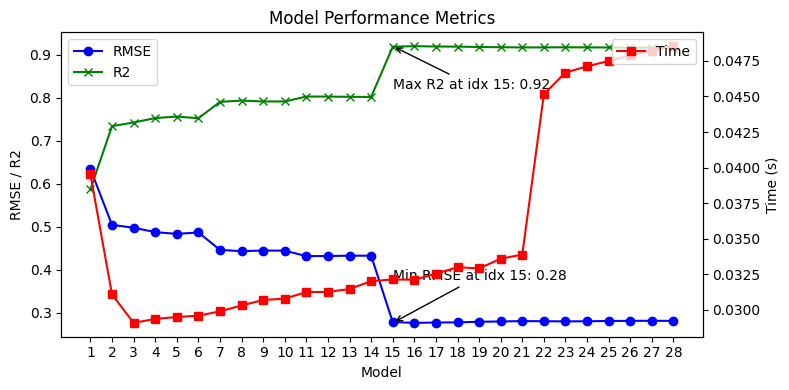

In [49]:
indices = range(1, len(rmse_list_1) + 1)

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE / R2')
ax1.plot(indices, rmse_list_1, marker='o', label='RMSE', color='blue')
ax1.plot(indices, r2_list_1, marker='x', label='R2', color='green')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax1.set_xticks(indices)
# ax1.set_xticklabels(corrs_sorted_abs_cols[indices], rotation=45, ha='right')

ax1.annotate(f'Min RMSE at idx {best_rmse_idx}: {best_rmse:.2f}', xy=(best_rmse_idx, best_rmse),
             xytext=(best_rmse_idx, best_rmse + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.annotate(f'Max R2 at idx {best_r2_idx}: {best_r2:.2f}', xy=(best_r2_idx, best_r2),
             xytext=(best_r2_idx, best_r2 - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->',))


ax2 = ax1.twinx()
ax2.set_ylabel('Time (s)')
ax2.plot(indices, t_list_1, marker='s', label='Time', color='red')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Model Performance Metrics')

plt.tight_layout()
plt.show()

### Train The Best Model

Now that we have found our best model, we will train it separately.

In [50]:
X_train_best, X_test_best, y_train, y_test = train_test_split(best_X, y, test_size=0.2)

In [51]:
X_train_best.columns

Index(['LogGDP', 'Ladder_SD_Mean', 'Life', 'Support', 'Delivery Quality',
       'Democratic Quality', 'Positive', 'Freedom', 'Corruption',
       'GINI_Gallup', 'Negative', 'GINI_WB_na', 'Generosity',
       'GINI_WB_Avg_00_15', 'Ladder_STD', 'GINI_WB_Avg_00_15_na'],
      dtype='object')

In [52]:
X_train_best.shape

(1249, 16)

In [53]:
X_train_best.head(1)

,LogGDP,Ladder_SD_Mean,Life,Support,Delivery Quality,Democratic Quality,Positive,Freedom,Corruption,GINI_Gallup,Negative,GINI_WB_na,Generosity,GINI_WB_Avg_00_15,Ladder_STD,GINI_WB_Avg_00_15_na
1032,0.0,0.477118,1.660926,0.481664,9.406178e-18,5.077119e-17,-0.827191,0.32186,-0.219074,-0.920055,2.013244,1.0,-3.395676e-19,7.070019e-16,1.230869,1.0


In [54]:
best_model = LinearRegression()

t0 = time.time()

best_model.fit(X_train_best, y_train)

t1 = time.time()

best_pred = best_model.predict(X_test_best)

rmse_lr, r2_lr, t_lr = lr_performance(y_test, best_pred, t0, t1, verbose=1)
lr_summary(best_model, rounding=4, verbose=1)
print("Best model done")

Model Performance
RMSE =   0.27
 R^2 =   0.92
Time =   0.00267

Model Summary
w1 = 0.145
w2 = -1.0433
w3 = -0.031
w4 = 0.0284
w5 = 0.0705
w6 = 0.0235
w7 = 0.0474
w8 = 0.0016
w9 = -0.1085
w10 = 0.0128
w11 = 0.0275
w12 = -0.0168
w13 = 0.0583
w14 = -0.0157
w15 = 0.6544
w16 = -0.1283
a = 0.0255

Best model done


<b>According to the RMSE scores, `best_model` performs twice as better as `model_top`! We now have an improved model.</b>

## Ensemble Modeling

We haven't considered other models we could incorporate through ensemble modeling. 
For each model, we will
1. Perform grid search cross-validation to find the best hyperparameters
2. Train and test the best model with those hyperparameters
3. Compute the RMSE, R2, and training time
We will try the following models: 
- Decision Trees
- K Nearest Neighbors
- Random Forest
- Gradient Boosting
- Stacking
  
At the end, we will visualize each model's scores to determine which stack could give the best balance between accuracy and time resources.

#### Decision Tree Regressor

In [55]:
dt_param_grid = {'max_depth': [4, 8, 16], 'min_samples_leaf': [25, 50, 75]}

dt_regressor = DecisionTreeRegressor()

dt_grid = GridSearchCV(dt_regressor, dt_param_grid, cv=5, scoring='neg_root_mean_squared_error')

dt_grid_search = dt_grid.fit(X_train_best, y_train)

rmse_dt = -1 * dt_grid_search.best_score_
dt_best_params = dt_grid_search.best_params_

print("Best DT model:")
print("RMSE: {:.2f}".format(rmse_dt))
print("Parameters:", dt_best_params)

Best DT model:
RMSE: 0.35
Parameters: {'max_depth': 8, 'min_samples_leaf': 25}


In [56]:
best_dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])

t0 = time.time()

best_dt_model.fit(X_train_best, y_train)

t1 = time.time()

t_dt = t1 - t0

best_dt_pred = best_dt_model.predict(X_test_best)
r2_dt = r2_score(y_test, best_dt_pred)

#### KNN Regressor

In [57]:
knn_param_grid = {'n_neighbors': [x*5 for x in range(1, 6)]}

knn_regressor = KNeighborsRegressor()

knn_grid = GridSearchCV(knn_regressor, knn_param_grid, cv=5, scoring='neg_root_mean_squared_error')

knn_grid_search = knn_grid.fit(X_train_best, y_train)

rmse_knn = -1 * knn_grid_search.best_score_
knn_best_params = knn_grid_search.best_params_

print("Best KNN model:")
print("RMSE: {:.2f}".format(rmse_knn))
print("Parameters:", knn_best_params)

Best KNN model:
RMSE: 0.31
Parameters: {'n_neighbors': 5}


In [58]:
best_knn_model = KNeighborsRegressor(n_neighbors=knn_best_params['n_neighbors'])

t0 = time.time()

best_knn_model.fit(X_train_best, y_train)

t1 = time.time()

t_knn = t1 - t0

best_knn_pred = best_knn_model.predict(X_test_best)
r2_knn = r2_score(y_test, best_knn_pred)

#### Random Forest

In [59]:
rf_param_grid = {'max_depth': [4, 8, 16, 32], 'n_estimators': [50, 100, 150, 200]}

rf_model = RandomForestRegressor()

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_root_mean_squared_error')

rf_grid_search = rf_grid.fit(X_train_best, y_train)

rmse_rf = -1 * rf_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_

print("Best RF model:")
print("RMSE: {:.2f}".format(rmse_rf))
print("Parameters:", rf_best_params)

Best RF model:
RMSE: 0.19
Parameters: {'max_depth': 32, 'n_estimators': 200}


In [60]:
best_rf_model = RandomForestRegressor(max_depth=rf_best_params['max_depth'], n_estimators=rf_best_params['n_estimators'])

t0 = time.time()

best_rf_model.fit(X_train_best, y_train)

t1 = time.time()

t_rf = t1 - t0

best_rf_pred = best_rf_model.predict(X_test_best)
r2_rf = r2_score(y_test, best_rf_pred)

#### Gradient Boosting Regressor

In [61]:
gbdt_param_grid = {'max_depth': [2, 4, 8], 'n_estimators': [100, 200, 300]}

gbdt_model = GradientBoostingRegressor()

gbdt_grid = GridSearchCV(gbdt_model, gbdt_param_grid, cv=5, scoring='neg_root_mean_squared_error')

gbdt_grid_search = gbdt_grid.fit(X_train_best, y_train)

rmse_gbdt = -1 * gbdt_grid_search.best_score_
gbdt_best_params = gbdt_grid_search.best_params_

print("Best GBDT model:")
print("RMSE: {:.2f}".format(rmse_gbdt))
print("Parameters:", gbdt_best_params)

Best GBDT model:
RMSE: 0.13
Parameters: {'max_depth': 4, 'n_estimators': 300}


In [62]:
best_gbdt_model = GradientBoostingRegressor(max_depth=gbdt_best_params['max_depth'], n_estimators=gbdt_best_params['n_estimators'])

t0 = time.time()

best_gbdt_model.fit(X_train_best, y_train)

t1 = time.time()

t_gbdt = t1 - t0

best_gbdt_pred = best_gbdt_model.predict(X_test_best)
r2_gbdt = r2_score(y_test, best_gbdt_pred)

#### Stacking All Models

In [69]:
estimators = [
    ("LR", best_model),
    ("DT", best_dt_model),
    ("KNN", best_knn_model),
    ("RF", best_rf_model),
    ("GBDT", best_gbdt_model)
]

stacking_model = StackingRegressor(estimators=estimators, passthrough=False)

t0 = time.time()

stacking_model.fit(X_train_best, y_train)

t1 = time.time()

t_stack = t1 - t0

stacking_pred = stacking_model.predict(X_test_best)

rmse_stack = np.sqrt(mean_squared_error(y_test, stacking_pred))
r2_stack = r2_score(y_test, stacking_pred)

### Visualize Ensemble Modeling

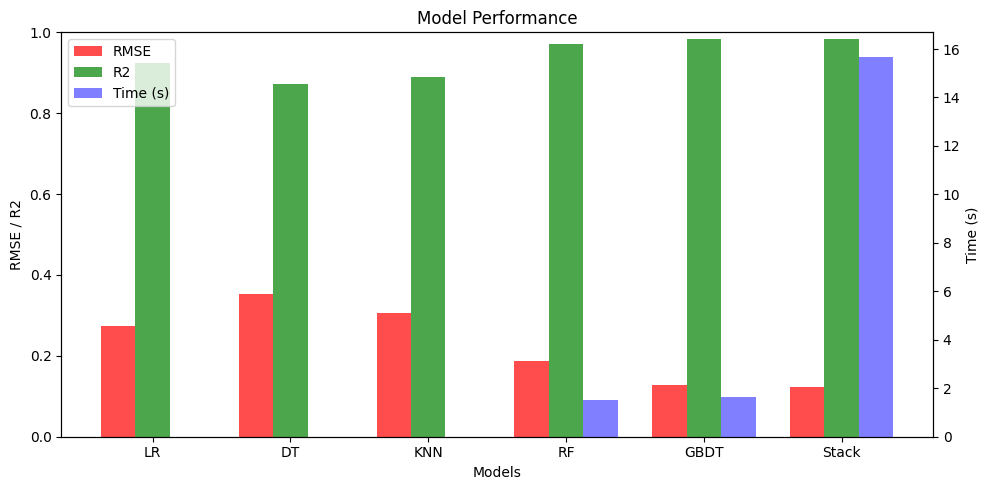

In [70]:
RMSE_Results = [rmse_lr, rmse_dt, rmse_knn, rmse_rf, rmse_gbdt, rmse_stack]
R2_Results = [r2_lr, r2_dt, r2_knn, r2_rf, r2_gbdt, r2_stack]
t_Results = [t_lr, t_dt, t_knn, t_rf, t_gbdt, t_stack]

rg = np.arange(len(RMSE_Results))

width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 5))

# rmse and r2 results
bars1 = ax1.bar(rg - width, RMSE_Results, width=width, color='red', label='RMSE', alpha=0.7)

bars2 = ax1.bar(rg, R2_Results, width=width, color='green', label='R2', alpha=0.7)

# time results
ax2 = ax1.twinx()
bars3 = ax2.bar(rg + width, t_Results, width=width, color='blue', alpha=0.5, label='Time (s)')

# set x-axis labels
labels = ['LR', 'DT', 'KNN', 'RF', 'GBDT', 'Stack']
ax1.set_xticks(rg)
ax1.set_xticklabels(labels)

# set plot labels and title
ax1.set_xlabel("Models")
ax1.set_ylabel("RMSE / R2")
ax2.set_ylabel("Time (s)")
ax1.set_ylim(0, 1)  # Adjust based on your data range
ax2.set_ylim(0, max(t_Results) + 1)  # Adjust based on your data range
plt.title('Model Performance')

# legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

Stacking all models increased training time by a large factor. It is probably better to stack a handful of models, like LR, KNN, and one of the DT ensemble models (RF and GBDT), to produce the most accurate and efficient model.

In [75]:
best_estimators = [
    ("LR", best_model),
    ("KNN", best_knn_model),
    ("GBDT", best_gbdt_model)
]

best_stack_model = StackingRegressor(estimators=best_estimators, passthrough=False)

t0 = time.time()

best_stack_model.fit(X_train_best, y_train)

t1 = time.time()

t_stack = t1 - t0

best_stack_pred = best_stack_model.predict(X_test_best)

rmse_best_stack = np.sqrt(mean_squared_error(y_test, best_stack_pred))
r2_best_stack = r2_score(y_test, best_stack_pred)

print("RMSE:", rmse_best_stack, "R2:", r2_best_stack, "Time:", t1 - t0)

RMSE: 0.1235105949361568 R2: 0.9843231973791179 Time: 8.230087518692017


## Deployment

In [76]:
# save model
pkl_model_filename = "Country_Happiness_Regression_Model.pkl" 
pickle.dump(best_stack_model, open(pkl_model_filename, 'wb'))

In [77]:
# load model
persistent_model = pickle.load(open(pkl_model_filename, 'rb'))
persistent_model

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('GBDT',
                               GradientBoostingRegressor(max_depth=4,
                                                         n_estimators=300))])

In [79]:
# see if models are the same
persistent_pred = persistent_model.predict(X_test_best) 

if (best_stack_pred == persistent_pred).all():
    print("Best predictions equal persistent predictions. Persistent best model successful.")

Best predictions equal persistent predictions. Persistent best model successful.
